In [5]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [8]:
X,_ = make_blobs(n_samples=500,centers=5,random_state=20)
print(X.shape)

(500, 2)


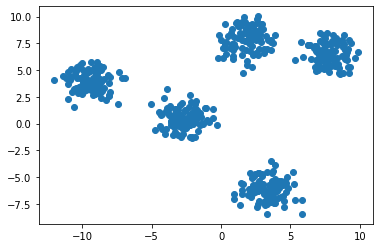

In [9]:
plt.scatter(X[:,0],X[:,1])
plt.show()

In [61]:
k = 5
colors =['red','green','blue','pink','orange']

#Dictionary
clusters = {}

#Init Cluster Centers
for i in range(k):
    center = 10*(2*(np.random.random((2,))-1))
    cluster = {
        'center' : center,
        'points' : [],
        'colors' : colors[i]
    }
    clusters[i] = cluster
    
print(clusters)

{0: {'center': array([ -6.54338052, -11.06988547]), 'points': [], 'colors': 'red'}, 1: {'center': array([-16.86496424,  -7.44666693]), 'points': [], 'colors': 'green'}, 2: {'center': array([-10.27906001, -16.77004361]), 'points': [], 'colors': 'blue'}, 3: {'center': array([ -3.49961493, -17.83890838]), 'points': [], 'colors': 'pink'}, 4: {'center': array([ -5.83469881, -10.19950511]), 'points': [], 'colors': 'orange'}}


In [64]:
clusters

{0: {'center': array([ -6.54338052, -11.06988547]),
  'points': [],
  'colors': 'red'},
 1: {'center': array([-16.86496424,  -7.44666693]),
  'points': [],
  'colors': 'green'},
 2: {'center': array([-10.27906001, -16.77004361]),
  'points': [],
  'colors': 'blue'},
 3: {'center': array([ -3.49961493, -17.83890838]),
  'points': [],
  'colors': 'pink'},
 4: {'center': array([ -5.83469881, -10.19950511]),
  'points': [],
  'colors': 'orange'}}

In [65]:
clusters[0]

{'center': array([ -6.54338052, -11.06988547]), 'points': [], 'colors': 'red'}

In [66]:
def distance(p1,p2):
    return np.sqrt(np.sum((p1-p2)**2))

In [67]:
# 1. Step - Assign Each Point to One of the cluster based upon 

def assignPointToCluster(clusters):
    m = X.shape[0]
    # For every Point
    for i in range(m):
        current_x = X[i]
        dist = []
        
        #For Every Cluster Center find the one nearest to the point 
        for j in range(k):
            cc = clusters[j]['center']
            d = distance(current_x,cc)
            dist.append(d)
        nearest = np.argmin(dist)
        clusters[nearest]['points'].append(current_x)

In [68]:
assignPointToCluster(clusters)

In [ ]:
# print(np.array(clusters[0]['points']))

In [69]:
# Update Cluster Centers based upon maen of the points assigned to cluster
def updateClusterCenters(clusters):
    for i in range(k):
        pts = np.array(clusters[i]['points'])
        if pts.shape[0]>0:
            u = pts.mean(axis=0)
            clusters[i]['center'] = u
            clusters[i]['points'] = []

In [72]:
def plotClusters(clusters):
    for i in range(k):
        #Get all the points assigned
        pts = np.array(clusters[i]['points'])
        ui = clusters[i]['center']
        if pts.shape[0]>0:
            clr = clusters[i]['colors']
            plt.scatter(pts[:,0],pts[:,1],c=clr)
        #Plot cluster center
        plt.scatter(ui[0],ui[1],color='black',marker='*')

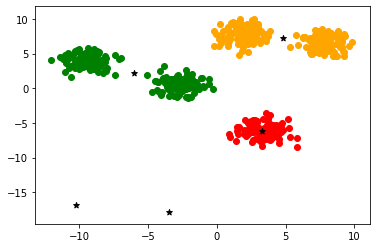

In [89]:
# Repeat 
assignPointToCluster(clusters)
plotClusters(clusters)
updateClusterCenters(clusters)

In [33]:
from sklearn.cluster import KMeans

In [34]:
km = KMeans(n_clusters=5)

In [35]:
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [37]:
KMeans?

In [40]:
centers = km.cluster_centers_

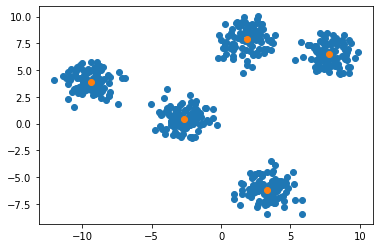

In [42]:
plt.scatter(X[:,0],X[:,1])
plt.scatter(centers[:,0],centers[:,1])

## Color Extraction

In [60]:
import cv2
cv2.imread('./tom.jpg')

array([[[106, 198, 139],
        [102, 194, 135],
        [ 97, 189, 130],
        ...,
        [172, 206, 206],
        [171, 205, 205],
        [171, 205, 205]],

       [[100, 192, 133],
        [ 99, 191, 132],
        [ 98, 190, 131],
        ...,
        [172, 206, 206],
        [171, 205, 205],
        [170, 204, 204]],

       [[ 94, 186, 127],
        [ 96, 188, 129],
        [ 99, 191, 132],
        ...,
        [173, 207, 207],
        [171, 205, 205],
        [169, 203, 203]],

       ...,

       [[ 42,  86,  47],
        [ 40,  84,  45],
        [ 43,  87,  48],
        ...,
        [ 63, 134,  91],
        [ 61, 132,  89],
        [ 59, 130,  87]],

       [[ 41,  85,  46],
        [ 42,  86,  47],
        [ 39,  83,  44],
        ...,
        [ 62, 133,  90],
        [ 60, 131,  88],
        [ 58, 129,  86]],

       [[ 40,  84,  45],
        [ 44,  88,  49],
        [ 37,  81,  42],
        ...,
        [ 62, 133,  90],
        [ 59, 130,  87],
        [ 57, 128,  85]]